In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir(r"C:\Users\Admin\Desktop\Start-up company")

In [4]:
data=pd.read_csv(r"50_Startups.csv")
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df=data.copy()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.shape

(50, 5)

In [8]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
df_state=pd.get_dummies(df["State"])
df_state.head()

,California,Florida,New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False


In [11]:
df_dumise=pd.get_dummies(df["State"],prefix='State')
df_dumise.head()

,State_California,State_Florida,State_New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False


In [12]:
df=pd.concat([df,df_dumise],axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,False,True
1,162597.70,151377.59,443898.53,California,191792.06,True,False,False
2,153441.51,101145.55,407934.54,Florida,191050.39,False,True,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,False,True,False


In [13]:
df=df.drop(["State_Florida"],axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,True
1,162597.70,151377.59,443898.53,California,191792.06,True,False
2,153441.51,101145.55,407934.54,Florida,191050.39,False,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,False,False


In [14]:
df=df.drop(["State"],axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False
2,153441.51,101145.55,407934.54,191050.39,False,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,False,False


In [15]:
corr=df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.515152
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,1.000000


<Axes: >

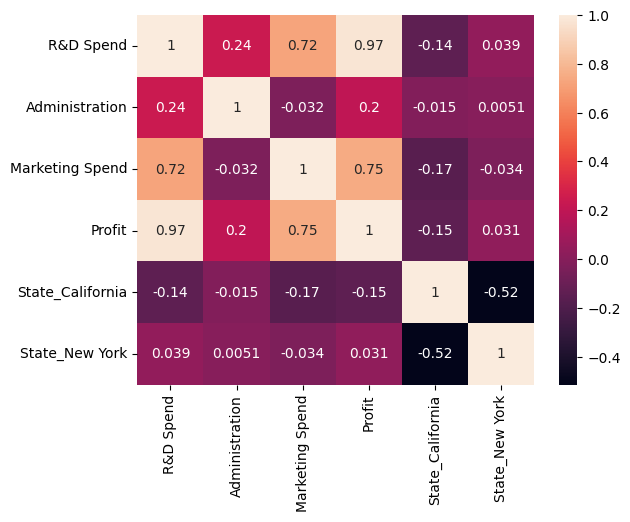

In [16]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

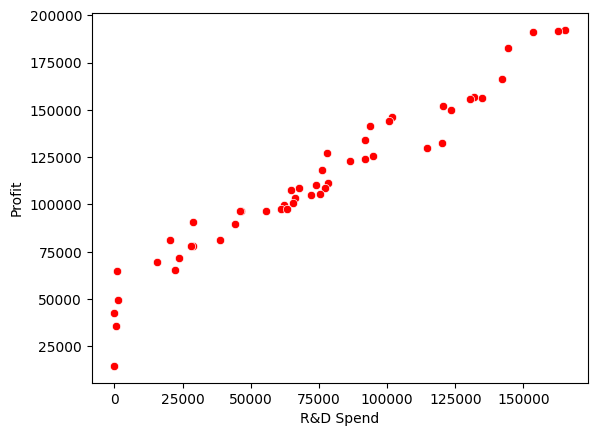

In [17]:
sns.scatterplot(x="R&D Spend",y="Profit",data=df,color="red")

<Axes: xlabel='Administration', ylabel='Profit'>

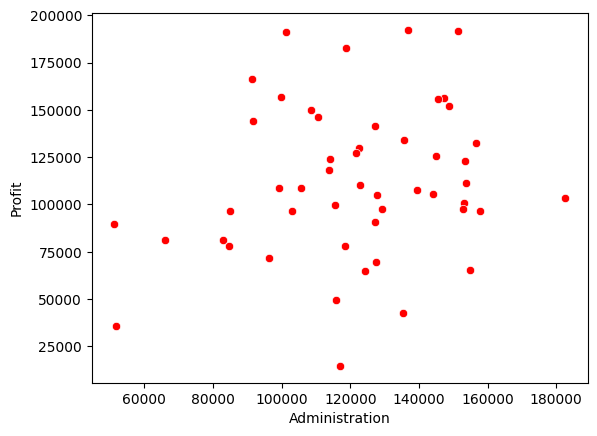

In [18]:
sns.scatterplot(x="Administration",y="Profit",data=df,color="red")

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

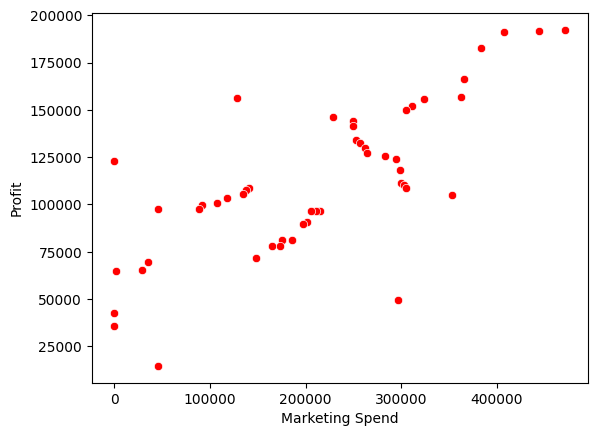

In [19]:
sns.scatterplot(x="Marketing Spend",y="Profit",data=df,color="red")

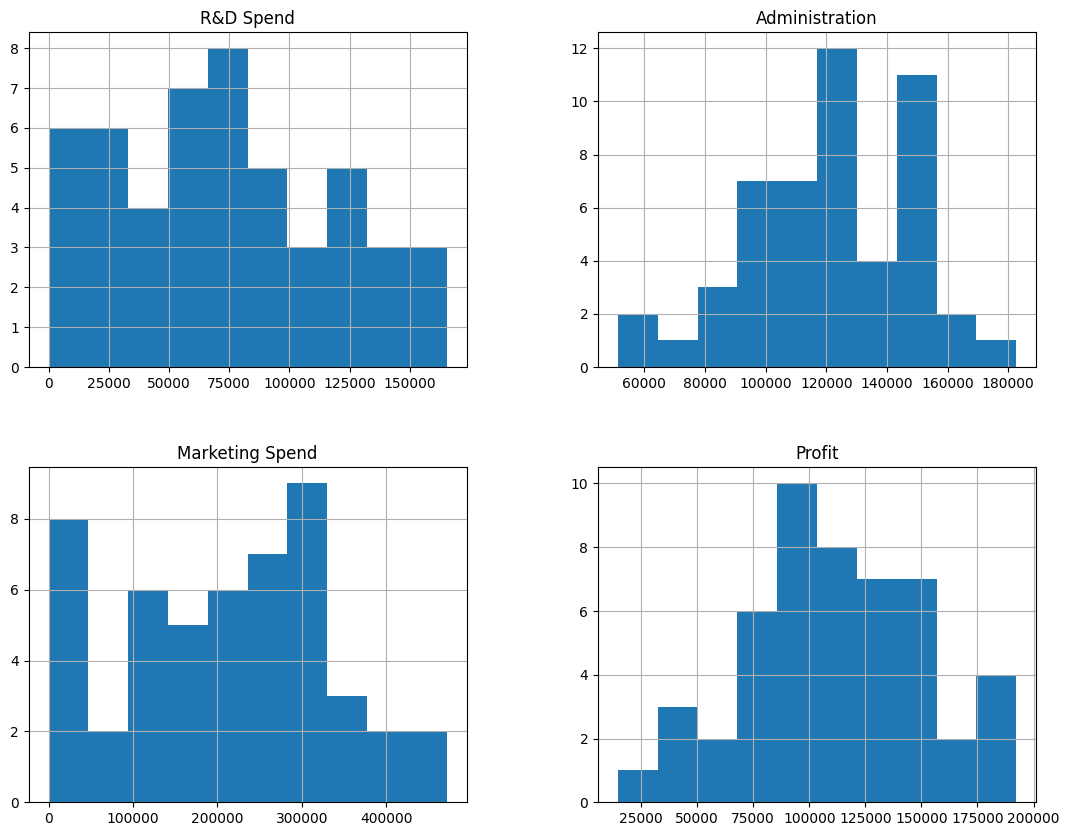

In [20]:
df.hist(figsize=(13,10))
plt.show()

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


Train_Test_Split

In [22]:
x=df.drop(["Profit"],axis=1)
y=df["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [23]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,True,False
2,153441.51,101145.55,407934.54,False,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,False,False


In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

In [25]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
48,542.05,51743.15,0.00,False,True
34,46426.07,157693.92,210797.67,True,False
2,153441.51,101145.55,407934.54,False,False
20,76253.86,113867.30,298664.47,True,False
37,44069.95,51283.14,197029.42,True,False


In [26]:
from sklearn.linear_model import LinearRegression
my_model=LinearRegression()


In [27]:
y_test.head()

39     81005.76
26    105733.54
22    110352.25
31     97483.56
29    101004.64
Name: Profit, dtype: float64

In [28]:
model=my_model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([ 82650.91171141, 114969.39758648, 118676.50929825,  96544.92731097,
       100747.90907156,  57717.39681268,  77491.15050368, 129634.19513027,
       102260.23338706, 113685.43462948,  88383.71117127, 177651.49084482,
       133416.99793513,  99051.42621284, 155021.60473219])

In [29]:
df=pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"diff between y_pred and y_test":abs(y_pred-y_test)})
df

,y_test,y_pred,diff between y_pred and y_test
39,81005.76,82650.911711,1645.151711
26,105733.54,114969.397586,9235.857586
22,110352.25,118676.509298,8324.259298
31,97483.56,96544.927311,938.632689
29,101004.64,100747.909072,256.730928
43,69758.98,57717.396813,12041.583187
41,77798.83,77491.150504,307.679496
17,125370.37,129634.195130,4263.825130
25,107404.34,102260.233387,5144.106613
23,108733.99,113685.434629,4951.444629


In [30]:
from sklearn.metrics import mean_absolute_error
mse=mean_absolute_error(y_test,y_pred)
mse

6657.417321576695

In [31]:
rmse=np.sqrt(mse)
rmse

81.5929979935576

In [32]:
model.score(x_train,y_train)

0.956142267350216

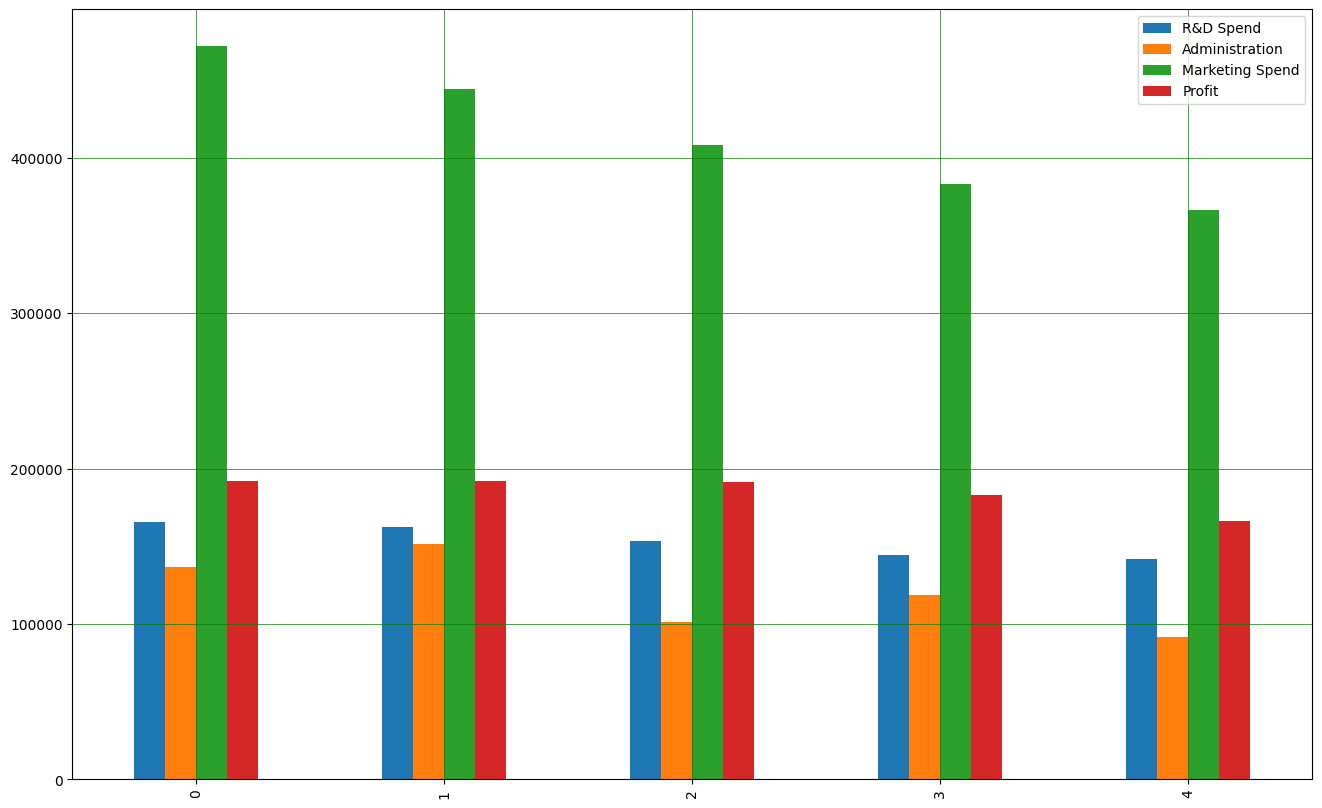

In [33]:
df_draw=data.head()
df_draw.plot(kind='bar',figsize=(16,10))
plt.grid(which="major",linestyle="-",color="green",linewidth="0.5")
plt.show()

In [34]:
print("intercept of the model:\n",model.intercept_)
print("*"*40)
print("coffecient of the model:\n",model.coef_)

intercept of the model:
 51762.58288825296
****************************************
coffecient of the model:
 [ 8.32481595e-01 -2.06061407e-02  2.58634933e-02 -4.02707371e+03
 -5.24760110e+03]


In [35]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,True,False
2,153441.51,101145.55,407934.54,False,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,False,False


In [36]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [37]:
print(x.dtypes)
print(y.dtypes)


R&D Spend           float64
Administration      float64
Marketing Spend     float64
State_California       bool
State_New York         bool
dtype: object
float64


To convert boolean to zero and one

In [38]:
# Identify boolean columns
bool_columns = x.select_dtypes(include='bool').columns

# Convert all boolean columns to integers
x[bool_columns] = x[bool_columns].astype(int)

print(x.head())

   R&D Spend  Administration  Marketing Spend  State_California  \
0  165349.20       136897.80        471784.10                 0   
1  162597.70       151377.59        443898.53                 1   
2  153441.51       101145.55        407934.54                 0   
3  144372.41       118671.85        383199.62                 0   
4  142107.34        91391.77        366168.42                 0   

   State_New York  
0               1  
1               0  
2               0  
3               1  
4               0  


In [39]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [40]:
print(x.dtypes)

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State_California      int32
State_New York        int32
dtype: object


Backward Elimination

In [41]:
import statsmodels.api as sm
stmodel=sm.OLS(y,x).fit()
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              765.9
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                    2.49e-42
Time:                        19:39:37   Log-Likelihood:                         -543.87
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      45   BIC:                                      1107.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7217      0.064     11.260      0.000       0.593       0.851
Administration       0.2847      0.038      7.465      0.000       0.208       0.362
Marketing Spend      0.0830      0.022      3.833      0.000       0.039       0.127
State_California  7720.4710   4539.299      1.701      0.096   -1422.146    1.69e+04
State_New York    7126.6916   4530.146      1.573      0.123   -1997.491    1.63e+04
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.929
Skew:                          -0.212   Prob(JB):                        0.628
Kurtosis:                       2.484   Cond. No.                     8.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
x=sm.add_constant(x)
stmodel=sm.OLS(y,x).fit()
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.34e-27
Time:                        19:39:37   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  -198.7888   3371.007     -0.059      0.953   -6992.607    6595.030
State_New York    -240.6758   3338.857     -0.072      0.943   -6969.701    6488.349
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

drop State_California

In [43]:
x=x.drop(['State_California'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           8.50e-29
Time:                        19:39:38   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
R&D Spend           0.8059      0.046     17.571      0.000       0.714       0.898
Administration     -0.0269      0.052     -0.521      0.605      -0.131       0.077
Marketing Spend     0.0271      0.017      1.625      0.111      -0.007       0.061
State_New York   -136.5042   2801.719     -0.049      0.961   -5779.456    5506.447
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

drop State_New York

In [44]:
x=x.drop(['State_New York'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           4.53e-30
Time:                        19:39:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

drop Administration

In [45]:
x=x.drop(['Administration'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.16e-31
Time:                        19:39:38   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

drop Marketing Spend

In [46]:
x=x.drop(['Marketing Spend'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           3.50e-32
Time:                        19:39:38   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""